Questão 1.

O objetivo é fazer um agrupamento de clientes com perfis semelhantes para identificar padrões de consumo.

c:\Users\Arthur\miniconda3\envs\infnet-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


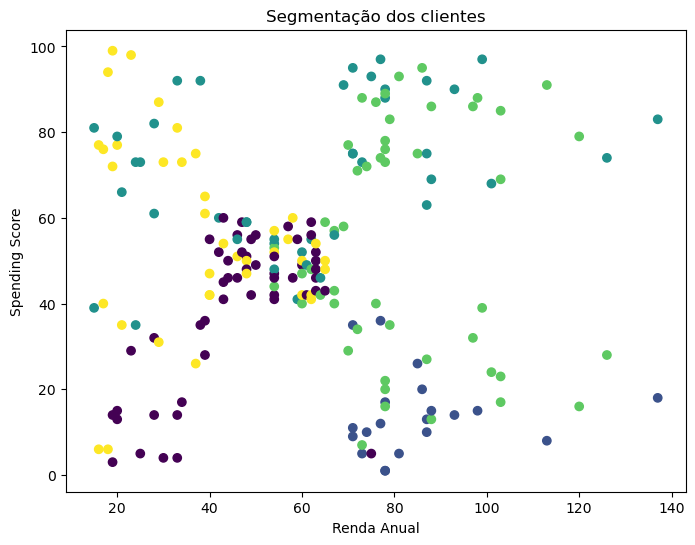

'\nO k-means faz a criação de clusters de clientes semelhantes, permitindo identificar padrões de consumo. \nEle pode falhar quando os dados mostram clusters com formatos não esféricos, densidades muito diferentes, presença de outliers ou uma escolha ruim do número de clusters.\n'

In [1]:
# Questão 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

df           = pd.read_csv("Mall_Customers.csv")
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
X            = df.drop(columns="CustomerID", axis=1)

std      = StandardScaler()
X_scaled = std.fit_transform(X)

kmeans        = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Renda Anual")
plt.ylabel("Spending Score")
plt.title("Segmentação dos clientes")
plt.show()

"""
O k-means faz a criação de clusters de clientes semelhantes, permitindo identificar padrões de consumo. 
Ele pode falhar quando os dados mostram clusters com formatos não esféricos, densidades muito diferentes, presença de outliers ou uma escolha ruim do número de clusters.
"""

Variância explicada por cada componente: [0.33690046 0.26230645]
Variância acumulada: [0.33690046 0.5992069 ]


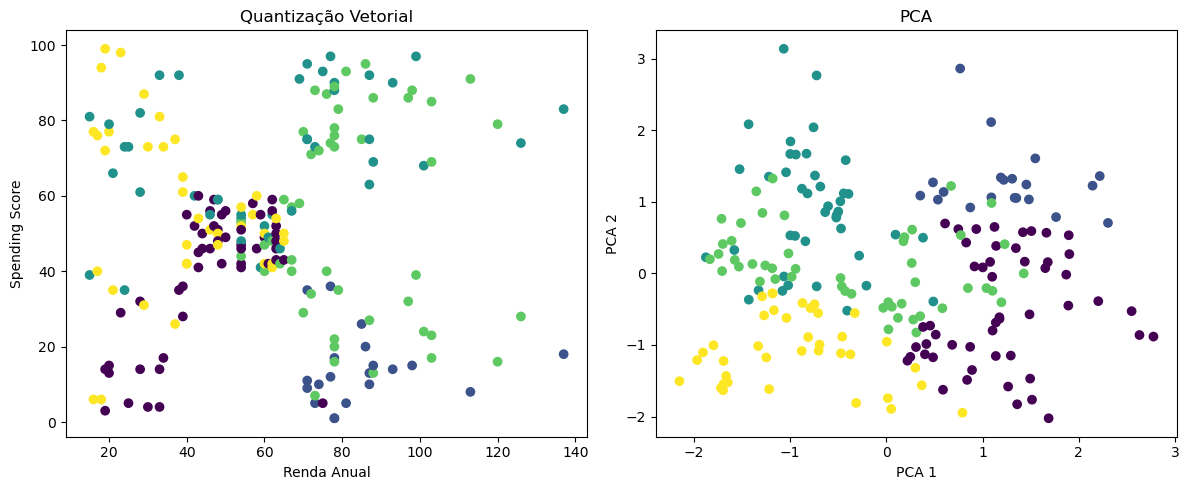

In [2]:
# Questão 3
"""
A quantização vetorial representa os dados originais pelos centróides dos clusters formados no K-Means,
reduzindo a dimensionalidade de forma aproximada, trocando cada ponto pelo cluster ao qual pertence.
"""
X_quantizacao = kmeans.cluster_centers_[df['Cluster']]
pca = PCA(n_components=2) # coloquei 2 pq ao meu ver, os componentes mais importantes são: Annual Income e Spending Score, o resto é meio genérico
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Variância acumulada:", np.cumsum(pca.explained_variance_ratio_))

"""
O PCA mostrou que os dois componentes principais explicam aproximadamente 60% da variância total. 
Embora com três componentes seja possível explicar em torno de 80% da variância, eu escolhi dois pra permitir uma representação bidimensional dos dados
"""

fig, axs = plt.subplots(1, 2, figsize=(12,5))

# quantização
axs[0].scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
axs[0].set_title("Quantização Vetorial")
axs[0].set_xlabel("Renda Anual")
axs[0].set_ylabel("Spending Score")
# PCA
axs[1].scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis')
axs[1].set_title("PCA")
axs[1].set_xlabel("PCA 1")
axs[1].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

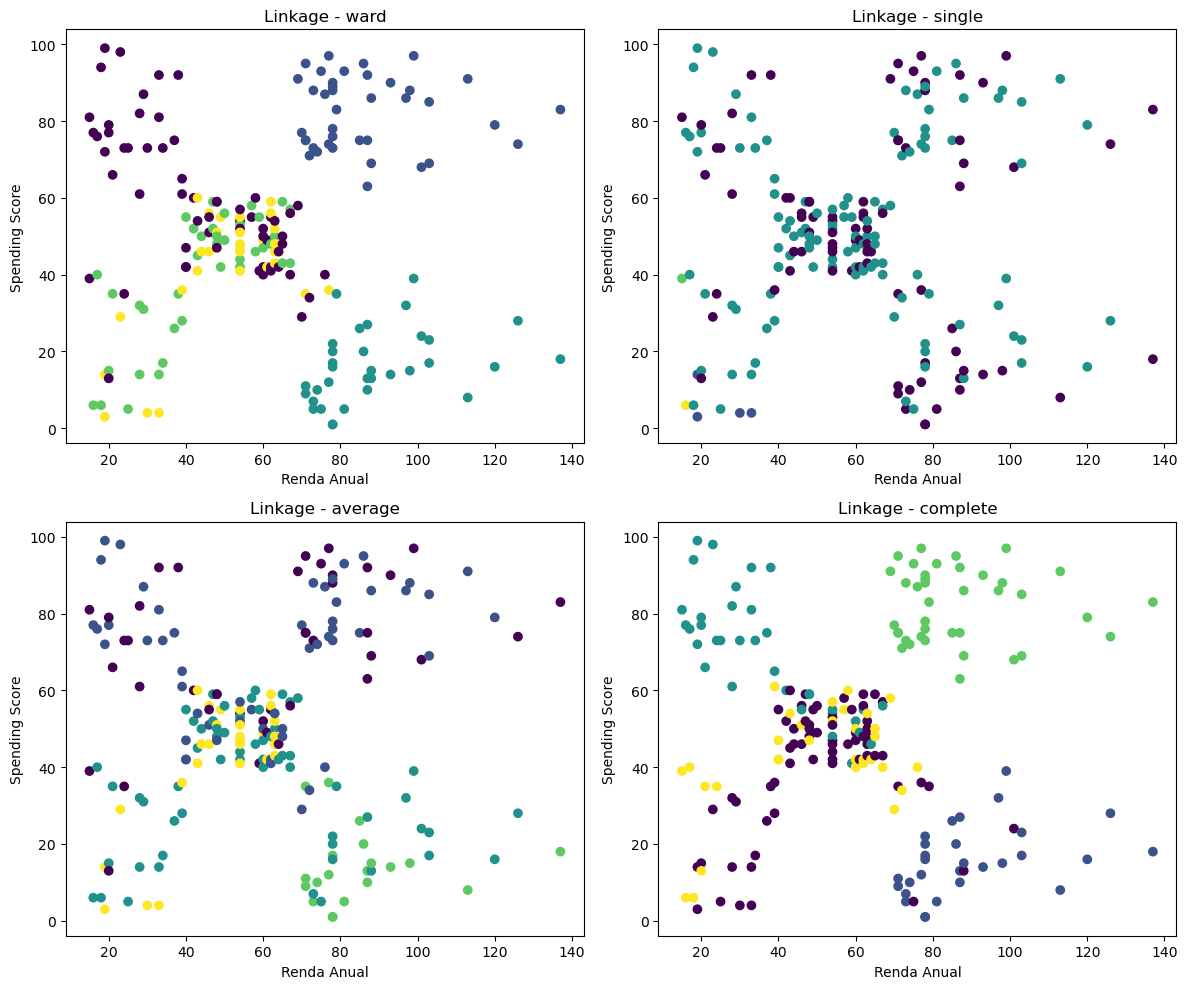

'\nWard: esse produz clusters mais compactos e esféricos, semelhantes ao K-Means.\n\nSingle: ele sofre com o efeito de encadeamento, formando grupos alongados e pouco representativos.\n\nAverage: cria clusters de tamanho mais equilibrado, usando a distância média entre pontos.\n\nComplete: gera clusters bem separados, mas acaba resultando em grupos de tamanhos diferentes.\n'

In [3]:
# Questão 4
linkages = ["ward", "single", "average", "complete"]

fig, axs = plt.subplots(2, 2, figsize=(12,10))

for ax, metodo in zip(axs.flatten(), linkages):
    model = AgglomerativeClustering(n_clusters=5, linkage=metodo, metric="euclidean")
    clusters = model.fit_predict(X_scaled)
    ax.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap="viridis")
    ax.set_title(f"Linkage - {metodo}")
    ax.set_xlabel("Renda Anual")
    ax.set_ylabel("Spending Score")

plt.tight_layout()
plt.show()
"""
Ward: esse produz clusters mais compactos e esféricos, semelhantes ao K-Means.

Single: ele sofre com o efeito de encadeamento, formando grupos alongados e pouco representativos.

Average: cria clusters de tamanho mais equilibrado, usando a distância média entre pontos.

Complete: gera clusters bem separados, mas acaba resultando em grupos de tamanhos diferentes.
"""

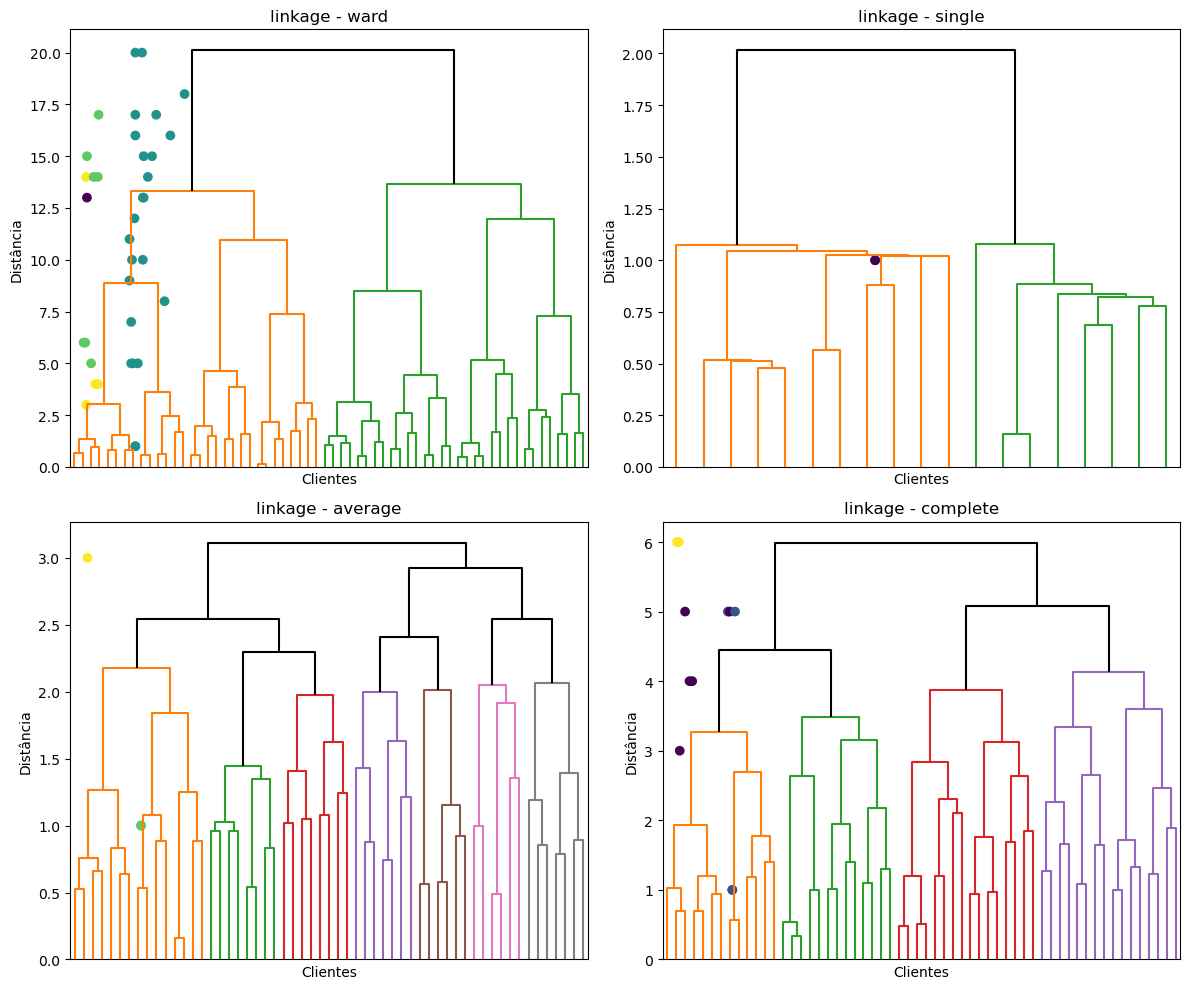

"\nWard: mostra que os clientes foram agrupados em poucos clusters grandes, ou seja, mais 'compactos'.\n\nSingle: sofre com o efeito de encadeamento, então a maior parte acaba ficando em uma única cadeia + um grupo separado.\n\nAverage: tem uma segmentação mais detalhada, formando mais subgrupos antes de chegar no corte.\n\nComplete: gera clusters bem separados, mas em menor número.\n"

In [4]:
# Questão 5 
for ax, metodo in zip(axs.flatten(), linkages):
    Z = linkage(X_scaled, method=metodo, metric="euclidean")
    plt.sca(ax)
    dendrogram(Z, truncate_mode="level", p=5, no_labels=True, above_threshold_color="black")
    ax.set_title(f"linkage - {metodo}")
    ax.set_xlabel("Clientes")
    ax.set_ylabel("Distância")

plt.tight_layout()
plt.show()

"""
Os dendrogramas nos deixam visualizar o processo hierárquico de fusão dos clusters, mostrando em qual ordem e a que distância os grupos foram unidos. 
Cada 'junção' representa a formação de um novo cluster, e a altura em que ocorre indica a distância entre os grupos.
"""

"""
Ward: mostra que os clientes foram agrupados em poucos clusters grandes, ou seja, mais 'compactos'.

Single: sofre com o efeito de encadeamento, então a maior parte acaba ficando em uma única cadeia + um grupo separado.

Average: tem uma segmentação mais detalhada, formando mais subgrupos antes de chegar no corte.

Complete: gera clusters bem separados, mas em menor número.
"""

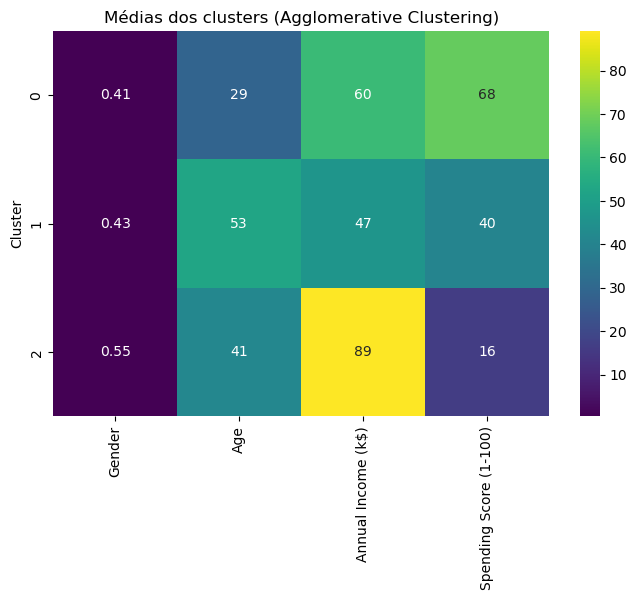

'\nA interpretação seria: \n\nCluster 0: adultos(mais novos), a maioria são mulheres, a renda média de 60k e alto gasto (68).\n\nCluster 1: adultos (mais velhos), a maioria também é de mulheres, renda média de 47k e gasto moderado (40).\n\nCluster 2: adultos (meia-idade), a maioria são homens, renda média de 89k e gasto baixo (16)\n'

In [5]:
# Questão 6
agg = AgglomerativeClustering(n_clusters=3, linkage="ward", metric="euclidean")
df['Cluster'] = agg.fit_predict(X_scaled)

df_cluster_mean = df.groupby("Cluster")[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].mean()
plt.figure(figsize=(8,5))
sns.heatmap(df_cluster_mean, annot=True, cmap="viridis", cbar=True)
plt.title("Médias dos clusters (Agglomerative Clustering)")
plt.ylabel("Cluster")
plt.show()

"""
A interpretação seria: 

Cluster 0: adultos(mais novos), a maioria são mulheres, a renda média de 60k e alto gasto (68).

Cluster 1: adultos (mais velhos), a maioria também é de mulheres, renda média de 47k e gasto moderado (40).

Cluster 2: adultos (meia-idade), a maioria são homens, renda média de 89k e gasto baixo (16)
"""

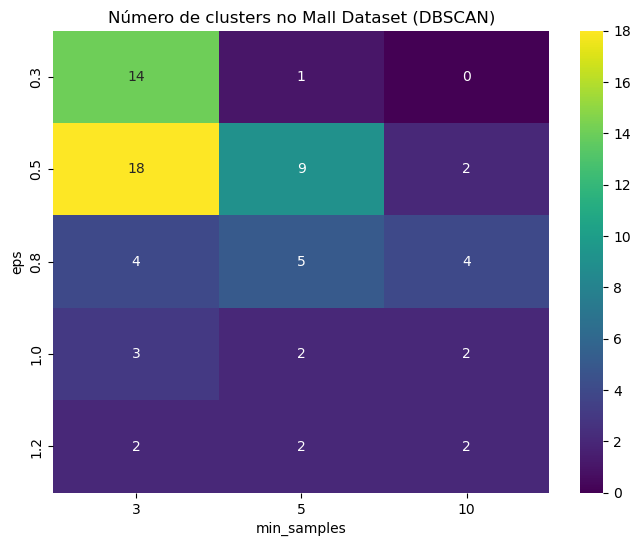

'\nApós os testes, nota-se que o valor de eps = 0.8 produziu a segmentação mais estável. \nCom min_samples = 3, o algoritmo encontrou 4 clusters; com min_samples = 5, encontrou 5 clusters; e com min_samples = 10, novamente 4 clusters. \nDessa forma, dá para concluir que os melhores resultados foram obtidos com eps = 0.8 e min_samples entre 3 e 10, permitindo uma melhor segmentação dos clientes em aproximadamente 4 a 5 grupos distintos.\n'

In [6]:
# Questão 8
eps_valores = [0.3, 0.5, 0.8, 1.0, 1.2]
min_samples_valores = [3, 5, 10]

resultados = []
for eps in eps_valores:
    for min_sample in min_samples_valores:
        db = DBSCAN(eps=eps, min_samples=min_sample).fit(X_scaled)
        labels = db.labels_
        n_clusters = len(set(labels) - {-1})
        resultados.append([eps, min_sample, n_clusters])

df_res = pd.DataFrame(resultados, columns=["eps","min_samples","n_clusters"])
pivot  = df_res.pivot(index="eps", columns="min_samples", values="n_clusters")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="viridis")
plt.title("Número de clusters no Mall Dataset (DBSCAN)")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

"""
Após os testes, nota-se que o valor de eps = 0.8 produziu a segmentação mais estável. 
Com min_samples = 3, o algoritmo encontrou 4 clusters; com min_samples = 5, encontrou 5 clusters; e com min_samples = 10, novamente 4 clusters. 
Dessa forma, dá para concluir que os melhores resultados foram obtidos com eps = 0.8 e min_samples entre 3 e 10, permitindo uma melhor segmentação dos clientes em aproximadamente 4 a 5 grupos distintos.
"""

In [7]:
# Questão 9
kmeans        = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

agg         = AgglomerativeClustering(n_clusters=5, linkage="ward")
labels_agg  = agg.fit_predict(X_scaled)

dbscan        = DBSCAN(eps=0.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

print("ARI KMeans vs Agglomerative:", adjusted_rand_score(labels_kmeans, labels_agg))
print("NMI KMeans vs Agglomerative:", normalized_mutual_info_score(labels_kmeans, labels_agg))
print("Silhouette KMeans:", silhouette_score(X_scaled, labels_kmeans))
print("Silhouette Agglomerative:", silhouette_score(X_scaled, labels_agg))
print("Silhouette DBSCAN:", silhouette_score(X_scaled, labels_dbscan))

print("\nARI KMeans vs DBSCAN:", adjusted_rand_score(labels_kmeans, labels_dbscan))
print("NMI KMeans vs DBSCAN:", normalized_mutual_info_score(labels_kmeans, labels_dbscan))
print("ARI Agglomerative vs DBSCAN:", adjusted_rand_score(labels_agg, labels_dbscan))
print("NMI Agglomerative vs DBSCAN:", normalized_mutual_info_score(labels_agg, labels_dbscan))

"""
O K-Means e o Agglomerative apresentaram maior concordância entre si (ARI=0.318; NMI=0.472) e melhores valores de silhueta (0.272 e 0.287), indicando clusters mais bem definidos.
O DBSCAN, embora identifique outliers, obteve silhouette inferior (0.172) e menor concordância com os demais métodos. 
Assim, o K-Means e o Agglomerative mostram-se mais adequados para esse dataset.
"""

ARI KMeans vs Agglomerative: 0.3179739788298699
NMI KMeans vs Agglomerative: 0.4718653691960422
Silhouette KMeans: 0.27191023466188324
Silhouette Agglomerative: 0.28699413201651747
Silhouette DBSCAN: 0.17209872109761942

ARI KMeans vs DBSCAN: 0.2738289000384745
NMI KMeans vs DBSCAN: 0.4674920232340268
ARI Agglomerative vs DBSCAN: 0.25122887366537433
NMI Agglomerative vs DBSCAN: 0.43752770170207356


c:\Users\Arthur\miniconda3\envs\infnet-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


'\nO K-Means e o Agglomerative apresentaram maior concordância entre si (ARI=0.318; NMI=0.472) e melhores valores de silhueta (0.272 e 0.287), indicando clusters mais bem definidos.\nO DBSCAN, embora identifique outliers, obteve silhouette inferior (0.172) e menor concordância com os demais métodos. \nAssim, o K-Means e o Agglomerative mostram-se mais adequados para esse dataset.\n'